# Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import loguniform
from sklearn.svm import SVR
import pandas as pd
import timeit
import time
from joblib import dump, load
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Data

In [9]:
df = pd.read_csv("1_RN_data_TRAIN.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()
d.shape

(408, 4)

# Hyperparameter Optimisation

In [3]:
# defining parameter range
param_grid = {'C': list(10. ** np.arange(-3, 8)),
              'gamma': list(10. ** np.arange(-5, 4)),
              'kernel': ['rbf']}
 
# define search
grid = RandomizedSearchCV(SVR(), param_grid, n_iter=50, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# fitting the model for grid search
grid.fit(d[:,:3], d[:,3])

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .................C=10000.0, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ...............C=10000000.0, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ...................C=100.0, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=1.0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ...................C=10.0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................C=10.0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...............C=1000000.0, gamma=1e-05, kernel=rbf; total time=   0.1s
[CV] END ...............C=1000000.0, gamma=1e-05, kernel=rbf; total time=   0.1s
[CV] END ...............C=1000000.0, gamma=0.00

[CV] END ...................C=10.0, gamma=1000.0, kernel=rbf; total time=   0.0s
[CV] END ...................C=10.0, gamma=1000.0, kernel=rbf; total time=   0.0s
[CV] END ...................C=10.0, gamma=1000.0, kernel=rbf; total time=   0.0s
[CV] END ...................C=10.0, gamma=1000.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.0, gamma=1.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

RandomizedSearchCV(estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0, 10000.0, 100000.0,
                                              1000000.0, 10000000.0],
                                        'gamma': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1.0, 10.0, 100.0,
                                                  1000.0],
                                        'kernel': ['rbf']},
                   scoring='neg_mean_squared_error', verbose=2)

In [4]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100000.0}
SVR(C=100000.0, gamma=0.1)
[CV] END .................C=100000.0, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ................C=10000000.0, gamma=0.1, kernel=rbf; total time= 6.9min
[CV] END .................C=100000.0, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ................C=10000000.0, gamma=0.1, kernel=rbf; total time= 7.8min
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=10000000.0, gamma=0.1, kernel=rbf; total time= 8.8min
[CV] END .................C=100000.0, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.

# RBF Fitting

In [105]:
# All Dataset
df = pd.read_csv("1_RN_data_TRAIN.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

t0 = time.time()
reg_all = SVR(kernel="rbf", gamma=0.1, C=100000)
reg_all.fit(d[:,:-1], d[:,-1])
t1 = time.time()
print("RBF train time: {} secs".format(t1-t0))

RBF train time: 0.9760408401489258 secs


In [106]:
# a/c > 1
d = np.load("1_g.npy")

t0 = time.time()
reg_g = SVR(kernel="rbf", gamma=0.1, C=100000)
reg_g.fit(d[:,:-1], d[:,-1])
t1 = time.time()
print("RBF train time: {} secs".format(t1-t0))

RBF train time: 0.0007538795471191406 secs


In [107]:
# a/c > 1
d = np.load("1_le.npy")

t0 = time.time()
reg_le = SVR(kernel="rbf", gamma=0.1, C=100000)
reg_le.fit(d[:,:-1], d[:,-1])
t1 = time.time()
print("RBF train time: {} secs".format(t1-t0))

RBF train time: 0.9115703105926514 secs


# Results

In [108]:
def sort(data):
    models = []
    model = np.unique(data[:,[0,1,2]], axis=0)
    
    for i in model:
        models.append(data[np.where((data[:,[0,1,2]] == i).all(axis=1))])

    return models 

def compare(models):
    results_all = []
    results_sep = []
    for model in models:
        result = np.zeros((len(model),6))
        model = np.delete(model, [2,4], 1)

        result[:,4] = reg.predict(model[:,:-1])
        results_all.append(result)
        
        # a/c separated
        result = np.zeros((len(model),6))
        if model[0,0] <= 1:
            result[:,4] = reg_le.predict(model[:,:-1])

        elif model[0,0] > 1:
            result[:,4] = reg_g.predict(model[:,:-1])

        else:
            print("Something wrong!")

        results_sep.append(result)
        
    return results_all, results_sep

def plot(models, results_all, results_sep, model_num):
    plt.scatter(models[model_num][:,-3], models[model_num][:,-1], label="Ground Truth")
    plt.plot(models[model_num][:,-3], results_all[model_num][:,4], label="RBF all")
    plt.plot(models[model_num][:,-3], results_sep[model_num][:,4], label="RBF separated")
    plt.title("a/c={}; a/t={}; c/b={}".format(models[model_num][0,0],
                                             models[model_num][0,1],
                                             models[model_num][0,2]))
    plt.xlabel("phi")
    plt.ylabel("Mg")
    plt.legend()
    plt.show()
    return

In [109]:
# Loading test dataset
df = pd.read_csv("1_RN_data.csv")
d = df.to_numpy()

In [110]:
models = sort(d)
len(models)

32

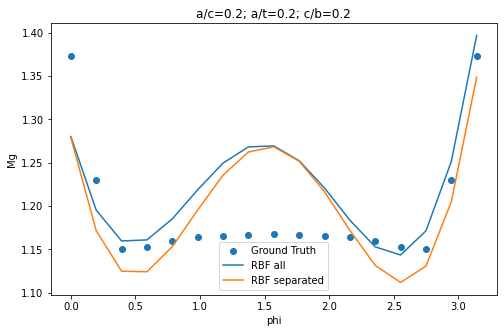

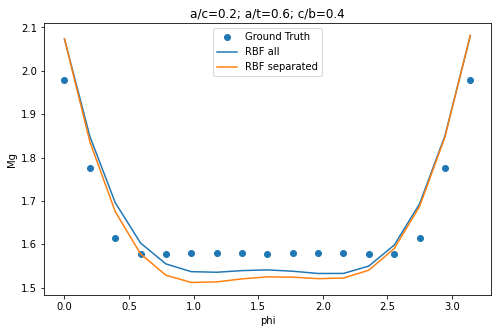

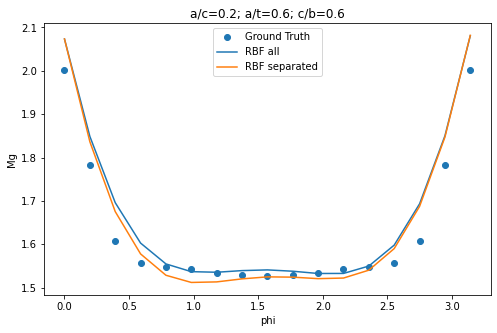

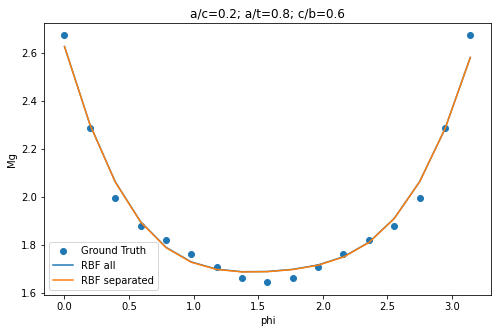

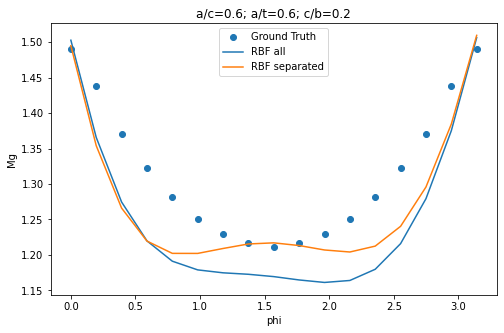

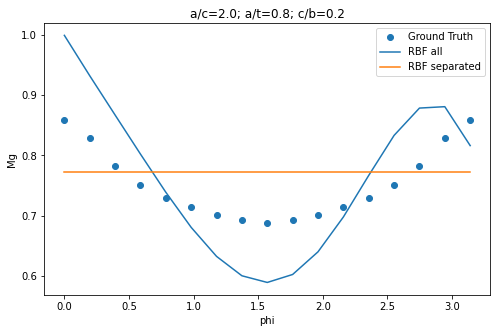

In [111]:
results_all, results_sep = compare(models)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, 0)

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/8))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/6))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/4))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)/2))

plt.figure(figsize=(8, 5))
plot(models, results_all, results_sep, int(len(models)-1))

In [112]:
np.save("RBF_results_all.npy", results_all)
np.save("RBF_results_sep.npy", results_sep)